In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df = pd.read_csv('\data_sets\Home Approval Loan\loan_sanction_train.csv')

loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# To show features of data
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_df.shape

(614, 13)

# EPLORATORY DATA ANALYSIS

In [7]:
loan_df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [8]:
loan_df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

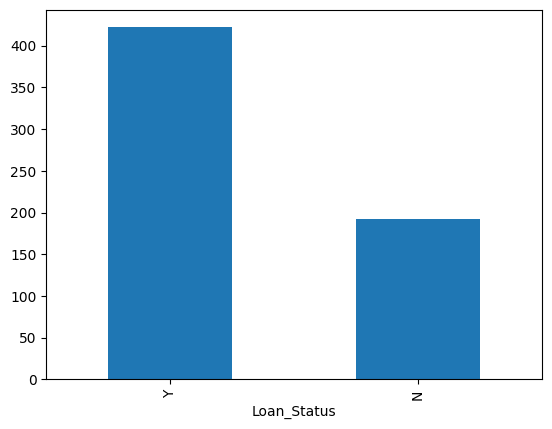

In [9]:
loan_df['Loan_Status'].value_counts().plot.bar()

In [10]:
# To clean the data, let's check for missing values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#  There are missing values in Gender, Married, Dependents
#  Credit_History, and Self_Employed features, so we can fill them using
#  the mode of the features

loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace = True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace = True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace = True)
loan_df['Self_Employed'].fillna(loan_df['Dependents'].mode()[0], inplace = True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace = True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace = True)

# use median to  fill the null values because LoanAmount has  outliers
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace = True)

In [12]:
# to fill the missing values in Loan_Amount-Term
loan_df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [13]:
# Recheck for null values
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

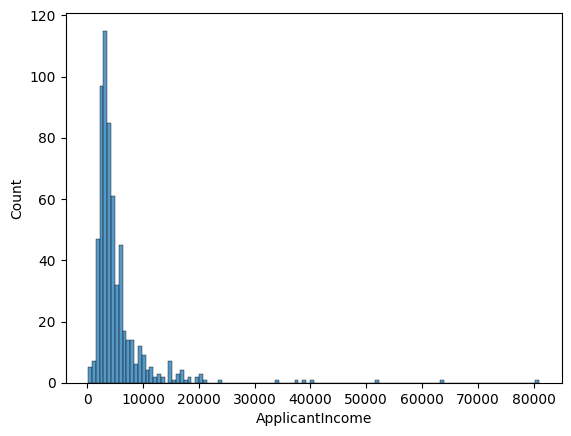

In [14]:
# Now that null null values are out of the way, we can
# expect to see visualization the appropriately  depicts 
# something meaningful.

# plot below shows that people with less income borrow more.

sns.histplot(loan_df['ApplicantIncome'])
plt.show()

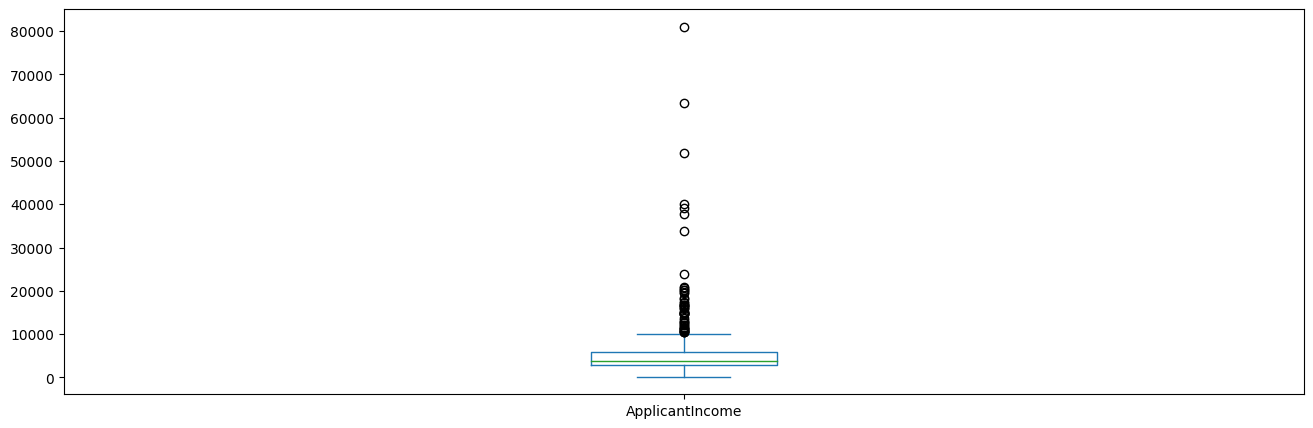

In [15]:
loan_df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

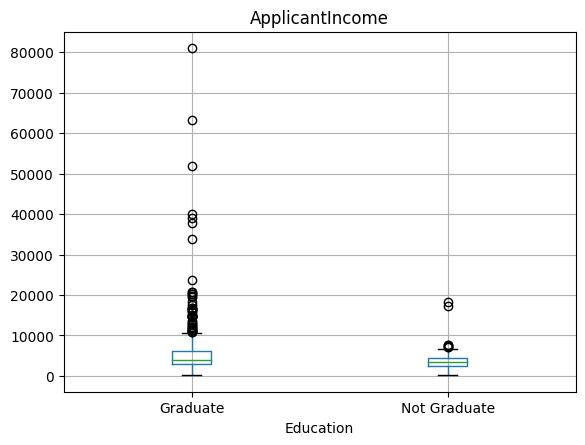

In [16]:
loan_df.boxplot(column='ApplicantIncome', by= 'Education')
plt.suptitle("")

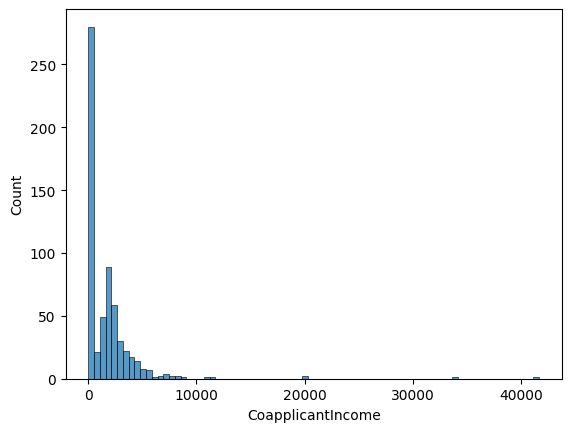

In [17]:
sns.histplot(loan_df['CoapplicantIncome'])
plt.show()

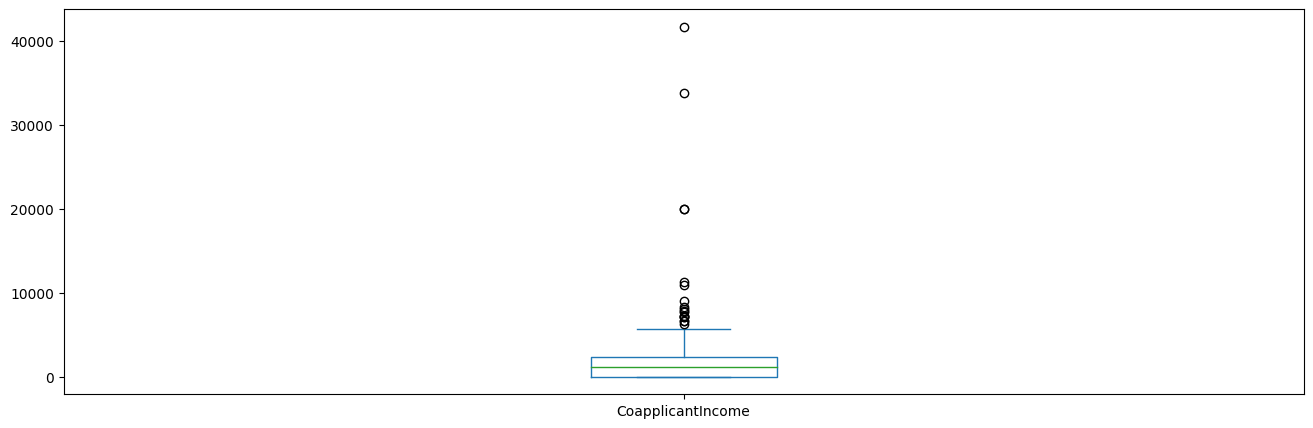

In [18]:
loan_df['CoapplicantIncome'].plot.box(figsize=(16, 5))
plt.show()

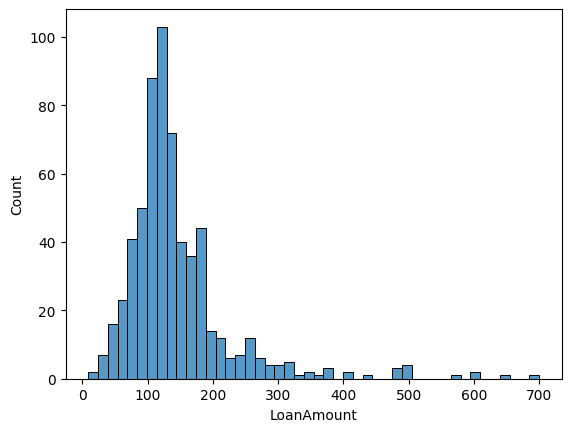

In [19]:
loan_df.notna()
sns.histplot(loan_df['LoanAmount'])
plt.show()

<Axes: >

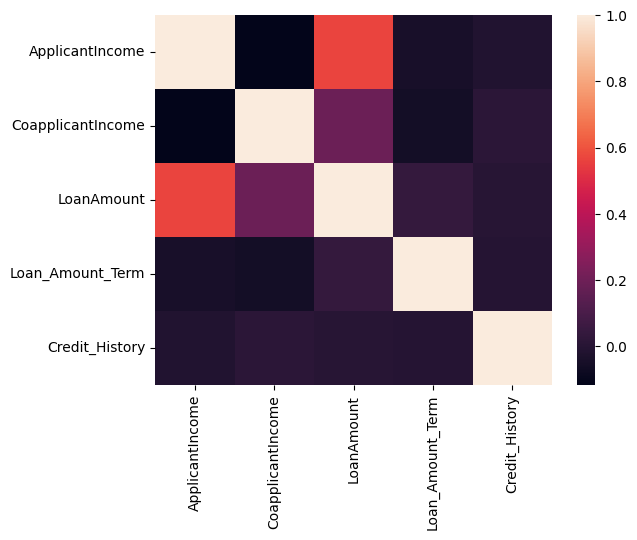

In [20]:
# Correlations between numeric features

loan_numeric = loan_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
         'Loan_Amount_Term', 'Credit_History']]
sns.heatmap(loan_numeric.corr())

<Axes: xlabel='Education', ylabel='count'>

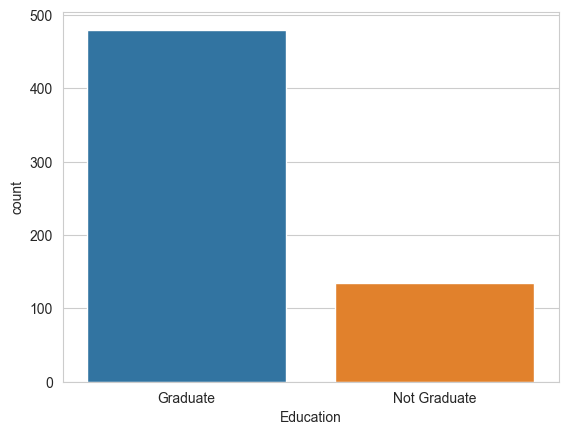

In [21]:
# to undertand allocation based on education
sns.set_style('whitegrid')
sns.countplot(x = 'Education', data= loan_df)

<Axes: xlabel='Credit_History', ylabel='count'>

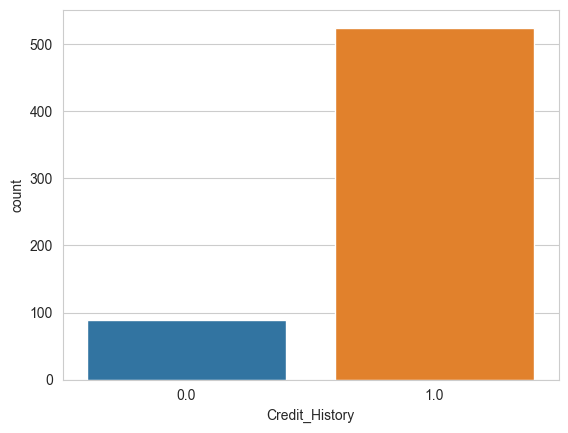

In [22]:
# Credit History
sns.countplot(x = 'Credit_History', data= loan_df)

<Axes: >

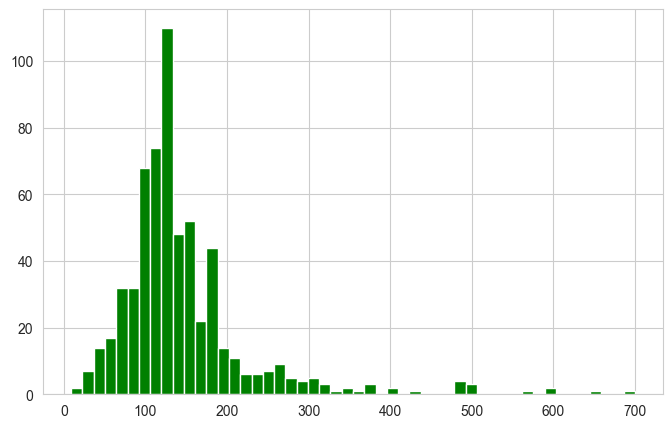

In [23]:
loan_df['LoanAmount'].hist(color = 'green', bins=50, figsize=(8,5))

In [24]:
# Encode Loan_Status
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

loan_df['Loan_Status'] = label_encoder.fit_transform(loan_df['Loan_Status'])

# Model Building

In [25]:
# Allocating the values to be modeled
train_test = loan_df.drop('Loan_ID', axis=1)

In [26]:
X = train_test.drop('Loan_Status', axis=1)
y = train_test.Loan_Status

In [27]:
# dummy variables will be created for the categorical data
X = pd.get_dummies(X)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,...,False,False,True,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,...,False,False,True,False,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,...,False,False,False,True,False,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,True,False,True,False,True,...,False,False,True,False,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,False,True,False,True,False,...,False,True,True,False,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,False,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True


In [28]:
train_test = pd.get_dummies(train_test)
train_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,...,False,False,True,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,...,False,False,True,False,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,...,False,False,False,True,False,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,...,False,False,True,False,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,1,False,True,False,True,...,False,True,True,False,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,1,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,1,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True


In [29]:
# we split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
# import LogisticRegression and accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
# predict the loan status

pred_loan = lr.predict(X_test)

In [32]:
# accuracy score

accuracy_score(y_test, pred_loan)

0.8054054054054054

In [33]:
classification_report = classification_report(y_test, pred_loan)

In [34]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.91      0.49      0.64        65
           1       0.78      0.97      0.87       120

    accuracy                           0.81       185
   macro avg       0.85      0.73      0.75       185
weighted avg       0.83      0.81      0.79       185



In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
# call the classifier
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [37]:
pred = gb.predict(X_test)

In [38]:
accuracy_score(y_test, pred) * 100

79.45945945945945

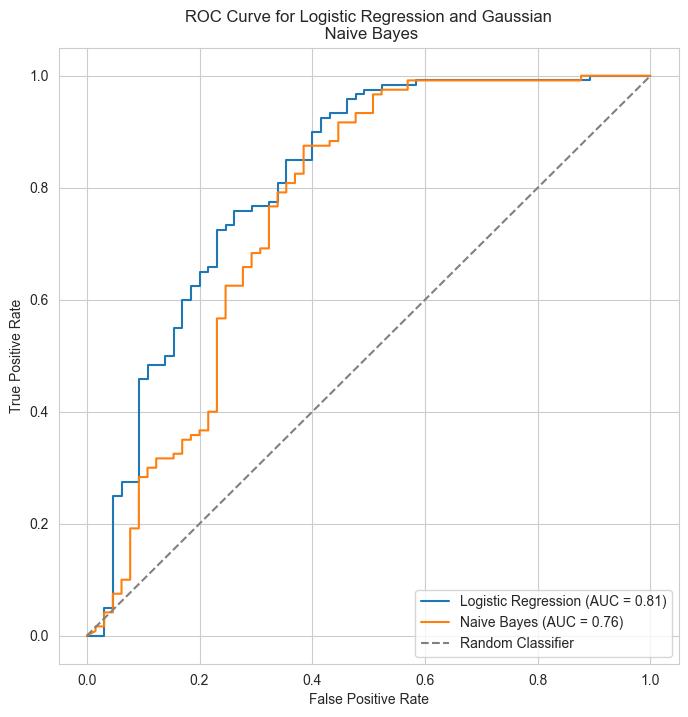

In [43]:
# Visualization of Model performance using ROC Curve
from sklearn.metrics import roc_curve, auc

# For logistic regression
lr_y_score = lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# FFor Gaussian naive bayes
gb_y_score = gb.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_y_score)
gb_roc_auc = auc(gb_fpr, gb_tpr)

# plot 
plt.figure(figsize=(8,8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Naive Bayes (AUC = {gb_roc_auc:.2f})')

plt.plot([0,1], [0,1], linestyle = '--', color = 'grey', label = 'Random Classifier' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression and Gaussian\n Naive Bayes')
plt.legend(loc='lower right')
plt.show()